In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
N = 10000

In [25]:
ip = np.random.randn(N) > 0.5 
ip = np.array(ip) 

In [26]:
s = 2 * ip - 1        

s = np.array(s) 

In [27]:
eb_no_db = np.arange(30) 

In [28]:
bit_error_rate_zero = np.zeros(len(eb_no_db))
bit_error_rate_mmse = np.zeros(len(eb_no_db))
bit_error_rate_zero_DFE = np.zeros(len(eb_no_db))
bit_error_rate_MMSE_DFE = np.zeros(len(eb_no_db))

In [29]:
def Zero_Forcing_SIC():

    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.dot(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.dot(H_Hermitian, H)
            
            H_inverse = np.linalg.pinv(H_Hermitian_H)
            
            W = np.dot(H_inverse, H_Hermitian)
            
            x_hat = np.dot(W, y)
            
            # upto zero forcing algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.matmul(h2_Hermitian, h2)
            
                h2_inverse = np.linalg.pinv(h2_Hermitian_h2)
            
                equalize_value = np.dot(h2_inverse, h2_Hermitian)
                
                x2_hat = np.dot(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.dot(h1_Hermitian, h1)
            
                h1_inverse = np.linalg.pinv(h1_Hermitian_h1)
            
                equalize_value = np.dot(h1_inverse, h1_Hermitian)
                
                x1_hat = np.dot(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)
#         print("received_bits_list",len(received_bits_list))
#         print("ip",len(ip))
        bit_error_rate_zero_DFE[jj] = nErr / N

    
    return bit_error_rate_zero_DFE

            
            
            

In [30]:
def MMSE_DFE():
    
    for jj in range(len(eb_no_db)):
        
        nErr = 0
        
        received_bits_list = []
        
        
        
        for ii in range(N//2):
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            x1 = s[2 * ii]
            
            x2 = s[2 * ii + 1]
            
            H = np.array([[h11, h12], [h21, h22]])
            
            n = np.array([[n1], [n2]])
            
            x = np.array([[x1], [x2]])
            
            Hx = np.dot(H, x)
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20))
            
            H_conjugate = np.conjugate(H)
            
            H_Hermitian = np.transpose(H_conjugate)
            
            H_Hermitian_H = np.dot(H_Hermitian, H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
            
            H_inverse = np.linalg.inv(H_Hermitian_H)
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.dot(W, y)
            
            # upto MMSE algorithm
            
            
            Px1 = np.abs(h11)**2 + np.abs(h21)**2
            
            Px2 = np.abs(h12)**2 + np.abs(h22)**2
            
            
            if Px1 > Px2:
                
                h1 = np.array([[h11],[h21]]) #x1 travel channel
                
                h2 = np.array([[h12],[h22]]) # remaining channel after substract
                
                x1_hat = x_hat[0,0] #after zero forcing x1 bit 
                
                hx = np.dot(h1,x1_hat)
                
                r = y - hx # substracting x1 bit with channel
                
                #finding remaining channel pseudo_inverse
                
                h2_conjugate = np.conjugate(h2)
            
                h2_Hermitian = np.transpose(h2_conjugate)
            
                h2_Hermitian_h2 = np.dot(h2_Hermitian, h2)
                
                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h2_hermitian_h2 = h2_Hermitian_h2 + identity_matrix * snr_inverse
                
                h2_inverse = np.linalg.inv(h2_Hermitian_h2)
            
                equalize_value = np.dot(h2_inverse, h2_Hermitian)
                
                x2_hat = np.dot(equalize_value,r)
                
                received_bits = np.real(x2_hat > 0)
                
                
                m = x1_hat > 0 
                
                n = received_bits[0, 0]   
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
                
            elif Px1 < Px2 :
                
                h2 = np.array([[h12],[h22]])
                
                h1 = np.array([[h11],[h21]])
                
                x2_hat = x_hat[1,0]
                
                hx = np.dot(h2,x2_hat)
                
                r = y - hx
                
                h1_conjugate = np.conjugate(h1)
            
                h1_Hermitian = np.transpose(h1_conjugate)
            
                h1_Hermitian_h1 = np.dot(h1_Hermitian, h1)
                
                identity_matrix = np.eye(1)
                
                snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
                
                h1_Hermitian_h1 = h1_Hermitian_h1 + identity_matrix * snr_inverse
                
                h1_inverse = np.linalg.inv(h1_Hermitian_h1)
            
                equalize_value = np.dot(h1_inverse, h1_Hermitian)
                
                x1_hat = np.dot(equalize_value,r)
                
                received_bits = np.real(x1_hat > 0)
                
                m = received_bits[0, 0]
                
                n = x2_hat > 0
                
                received_bits_list.append(m)
                
                received_bits_list.append(n)
            
        nErr = np.sum(ip != received_bits_list)

        bit_error_rate_MMSE_DFE[jj] = nErr / N

    
    return bit_error_rate_MMSE_DFE

            

In [31]:
def Zero_Forcing(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the Zero Forcing equalization matrix W = inv(H^H*H)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.dot(H_Hermitian,H) 
            
            H_inverse = np.linalg.pinv(H_Hermitian_H) 
            
            W = np.dot(H_inverse, H_Hermitian)
            
            x_hat = np.dot(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_zero[jj] = nErr / N 
        
        
        
        

    return  bit_error_rate_zero


In [32]:
def MMSE(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the MMSE equalization matrix W = inv(H^H*H+(1/snr)I)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.dot(H_Hermitian,H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (eb_no_db[jj] / 10)))
            
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
                               

            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.dot(H_inverse, H_Hermitian)
            
            x_hat = np.dot(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_mmse[jj] = nErr / N 
        
        
        
        

    return bit_error_rate_mmse

[0.2832 0.2537 0.2128 0.1889 0.1518 0.1359 0.1064 0.0831 0.0693 0.0535
 0.043  0.0375 0.0285 0.0197 0.0167 0.0171 0.0118 0.0092 0.0074 0.0068
 0.0027 0.0035 0.0029 0.0022 0.0018 0.0016 0.0019 0.0014 0.0004 0.0005]
[0.2452 0.2198 0.1941 0.1752 0.1551 0.1258 0.1061 0.0869 0.0721 0.0536
 0.0427 0.0361 0.0256 0.0211 0.0147 0.0125 0.0093 0.0089 0.0066 0.0052
 0.0035 0.0035 0.0027 0.0022 0.002  0.0007 0.0009 0.0008 0.0006 0.0004]
[0.2803 0.2489 0.2136 0.1934 0.1551 0.1236 0.1056 0.0811 0.0677 0.0542
 0.0432 0.0375 0.0291 0.0207 0.0187 0.0127 0.0102 0.0093 0.0067 0.0048
 0.0037 0.0029 0.0023 0.0025 0.0021 0.0016 0.0012 0.0007 0.0005 0.0005]
[0.2458 0.2192 0.1957 0.174  0.1576 0.1288 0.1115 0.0938 0.073  0.0551
 0.0427 0.0328 0.0272 0.0195 0.0163 0.0126 0.0114 0.0089 0.0065 0.0042
 0.0035 0.003  0.0025 0.0021 0.0013 0.0011 0.001  0.0009 0.0005 0.0005]


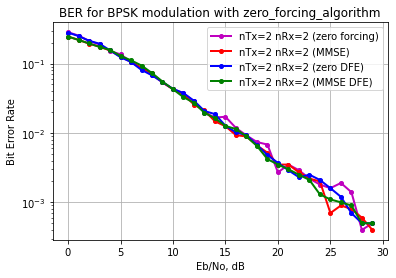

In [33]:
result_zero = Zero_Forcing()
result_mmse = MMSE()
result_zero_DFE = Zero_Forcing_SIC()
resutl_MMSE_DFE = MMSE_DFE()
print(result_zero)
print(result_mmse)
print(result_zero_DFE)
print(resutl_MMSE_DFE)
plt.figure()
plt.semilogy(eb_no_db, result_zero, 'mo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero forcing)')
plt.semilogy(eb_no_db, result_mmse, 'ro-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE)')
plt.semilogy(eb_no_db, result_zero_DFE, 'bo-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (zero DFE)')
plt.semilogy(eb_no_db, resutl_MMSE_DFE, 'go-', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE DFE)')
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()